<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Virus_types_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [2]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 2.16 MiB | 2.05 MiB/s, done.


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path = os.listdir('/content/drive/MyDrive/Virus/Trainning')
classes = {'Virus - PSTV foliar symptoms':0, 'Virus - Rugose mosaic symptom':1}

In [6]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive//Virus/Trainning/'+cls
    for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        
        #Resize
        resizedImage = cv2.resize(realimage, (400,400))
        #contrast improve
        color_contrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogram_image=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        clahe_image=cv2.merge((op2_R,op2_G,op2_B))
        #outputImages=[smooth_image, histogram_image,clahe_image]
        #titles=['Original Image','Adjust histogram','clahe Image']
        #for i in range(3):
         #   plt.subplot(1,3,i+1)
          #  plt.imshow(outputImages[i])
           # plt.title(titles[i])
            #plt.xticks([])
            #plt.yticks([])
        #plt.show()
       
        x.append(clahe_image)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/Preprocessed/'+str(img_no)+'.jpg',clahe_image)   
        #img_no+=1
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)
     


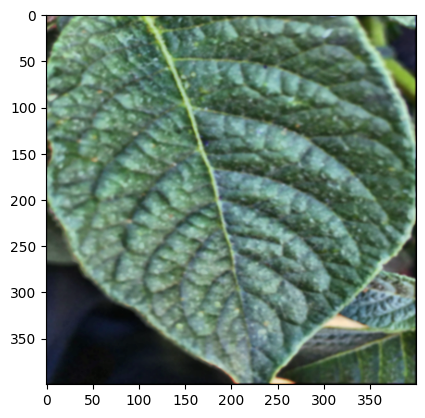

In [7]:
plt.imshow(x[150])

In [8]:
!git config --global user.email "piumi.18@itfac.mrt.ac.lk"
!git config --global user.name "Piumir3"
